# Visual Python을 활용한 머신러닝 실습  
* 순서
  1. 데이터 수집
  2. 데이터 전처리 및 train_test_split
  3. 모델 생성
  4. 훈련 fit
  5. 예측 predict 
  6. 평가 evaluation
  7. 시각화
* (실습) RandomForest 예측모델
* 

## 환경구성 : Chart Style
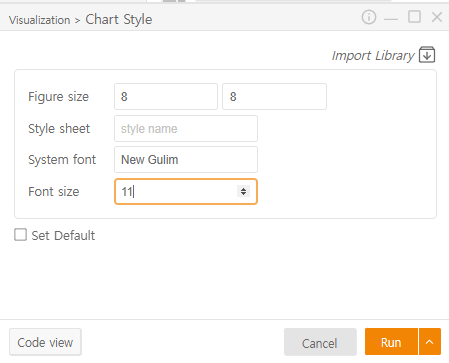

In [21]:
# Visual Python: Visualization > Chart Style
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rc('figure', figsize=(8, 8))

from matplotlib import rcParams
rcParams['font.family'] = 'New Gulim'
rcParams['font.size'] = 11
rcParams['axes.unicode_minus'] = False

## 환경구성: Package 추가 : Import => Machine Learning
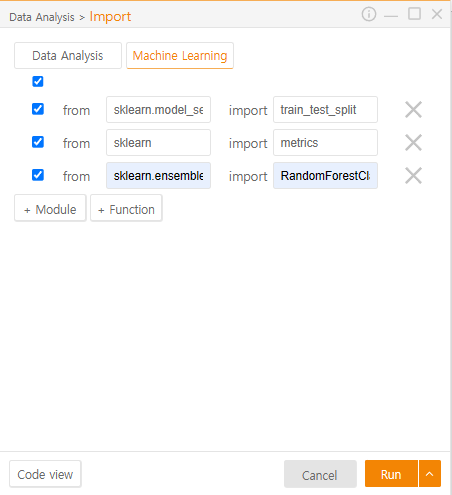  

In [16]:
# Visual Python: Data Analysis > Import
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier

## 1. 데이터 가져오기 : Data Sets
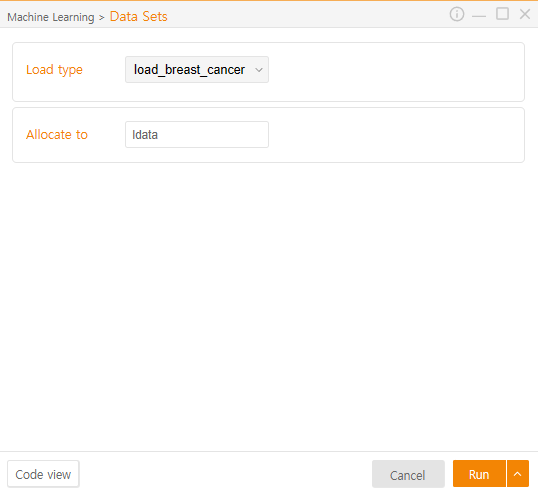    

In [24]:
# Visual Python: Machine Learning > Data Sets
import pandas as pd

In [25]:
# Visual Python: Machine Learning > Data Sets
from sklearn.datasets import load_breast_cancer

ldata = load_breast_cancer()
# Create DataFrame
df_ldata = pd.DataFrame(data=ldata.data, columns=ldata.feature_names)
df_ldata['target'] = ldata.target
df_ldata

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


## 2. 데이터 전처리 및 train_test_split
1. Frame 선택
   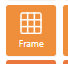  
2. 독립변수 선택: df   
    > df_ldata DataFrame에서 target 속성을 제거하고 df로 복사  
    > 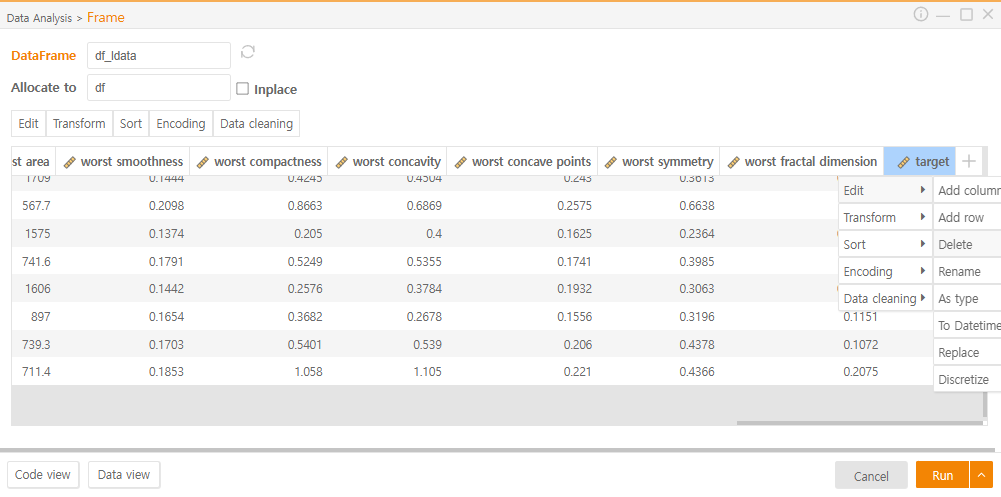
    > 
     

In [69]:
# Visual Python: Data Analysis > Frame
df = df_ldata.copy()
df.drop(['target'], axis=1, inplace=True)
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


## 2. 데이터 전처리 및 train_test_split  
3. Subset 선택  : 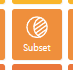
4. 종속변수 선택: y  
   > 수집된 데이터(df_ldata)에서 종속변수(y) 추출  
   > 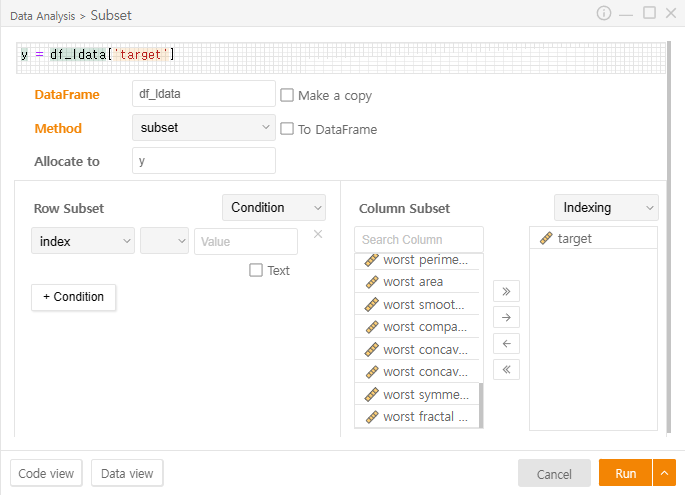  

In [85]:
# Visual Python: Data Analysis > Subset
y = df_ldata['target']
y

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int32

## 2. 데이터 전처리 및 train_test_split
5. train_test_split : 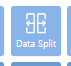 선택  
   >  train : test 비율 => 7 : 3  
   >  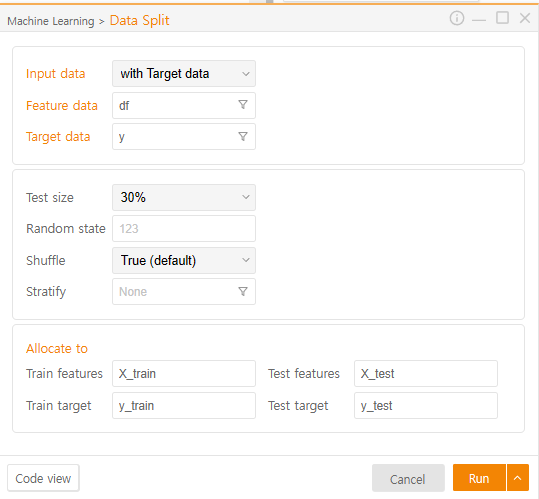  

In [93]:
# Visual Python: Machine Learning > Data Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.3)

## 3. 머신러닝 모델 생성  
1. 모델 선택 : 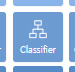
   > 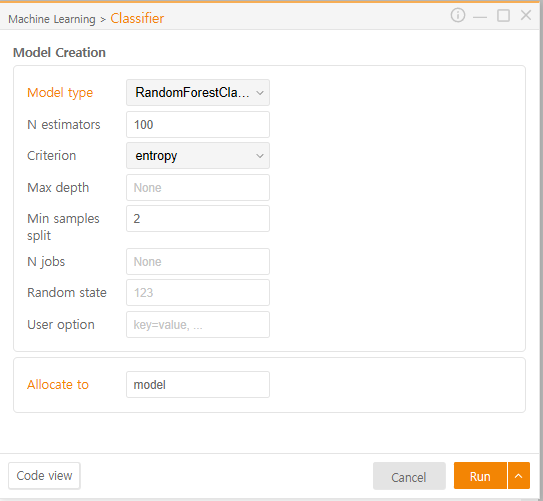  

In [98]:
# Visual Python: Machine Learning > Classifier
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(criterion='entropy')

## 4. 훈련: fit 
* 모델 훈련 : 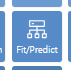 선택  
  > 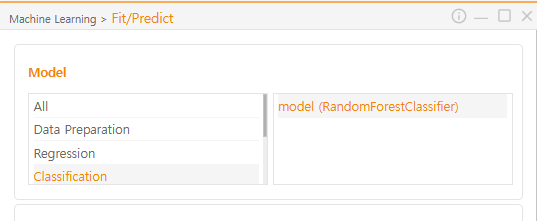
  > <hr color=blue size=2 width=100px /> 
  
  > 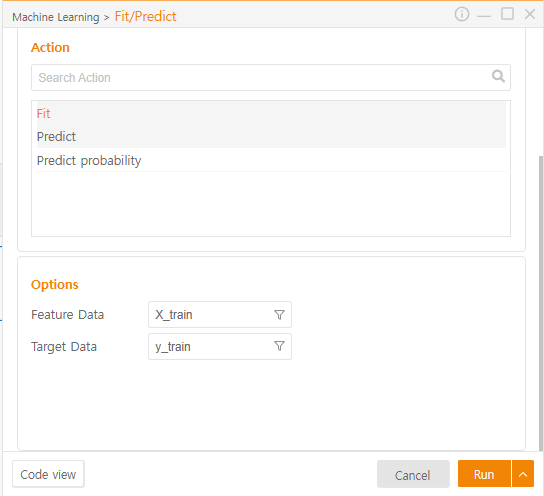  

In [113]:
# Visual Python: Machine Learning > Fit/Predict
model.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy')

## 5. 예측 predict  
* 예측 : 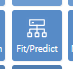 선택  
  > 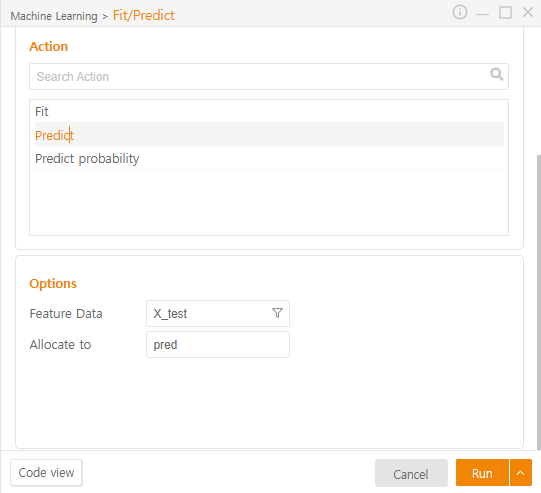
  >   
  > 테스트데이터: X_test  
  > 예측결과: pred  


In [120]:
# Visual Python: Machine Learning > Fit/Predict
pred = model.predict(X_test)
pred

array([0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1])

## 6. 평가 : evaluation  
* 평가 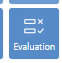 선택
  > 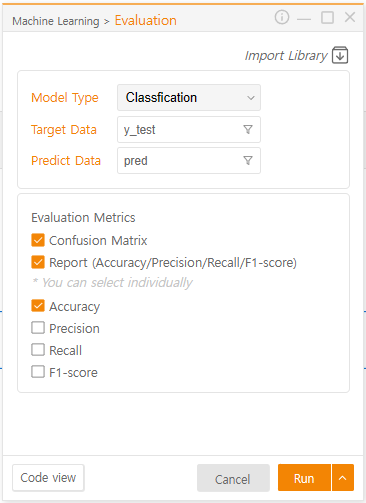  

In [144]:
# Visual Python: Machine Learning > Evaluation
from IPython.display import display, Markdown

In [145]:
# Visual Python: Machine Learning > Evaluation
# Confusion Matrix
display(Markdown('### Confusion Matrix'))
display(pd.crosstab(y_test, pred, margins=True))

### Confusion Matrix

col_0,0,1,All
target,,,
0,58,4,62
1,3,106,109
All,61,110,171


In [146]:
# Visual Python: Machine Learning > Evaluation
# Classification report
print(metrics.classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94        62
           1       0.96      0.97      0.97       109

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



In [147]:
# Visual Python: Machine Learning > Evaluation
# Accuracy
print('Accuracy: {}'.format(metrics.accuracy_score(y_test, pred)))

Accuracy: 0.9590643274853801


## features importance
* 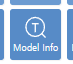
  > 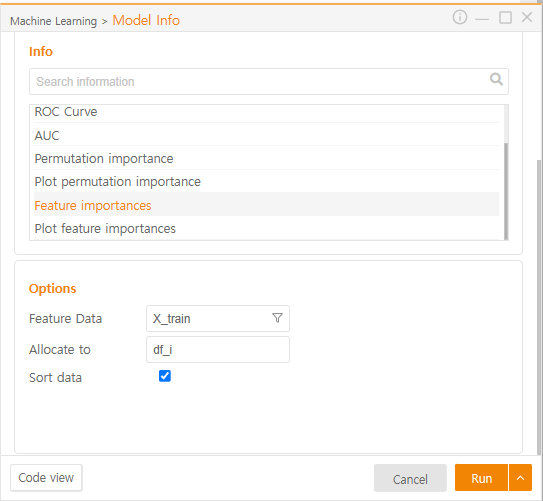  

In [153]:
# Visual Python: Machine Learning > Model Info
def vp_create_feature_importances(model, X_train=None, sort=False):
    if isinstance(X_train, pd.core.frame.DataFrame):
        feature_names = X_train.columns
    else:
        feature_names = [ 'X{}'.format(i) for i in range(len(model.feature_importances_)) ]
                        
    df_i = pd.DataFrame(model.feature_importances_, index=feature_names, columns=['Feature_importance'])
    df_i['Percentage'] = 100 * df_i['Feature_importance']
    if sort: df_i.sort_values(by='Feature_importance', ascending=False, inplace=True)
    df_i = df_i.round(2)
                        
    return df_i

In [154]:
# Visual Python: Machine Learning > Model Info
df_i = vp_create_feature_importances(model, X_train, sort=True)
df_i

,Feature_importance,Percentage
worst area,0.15,15.36
worst radius,0.12,11.54
worst perimeter,0.11,10.57
worst concave points,0.10,10.47
mean concave points,0.07,7.43
mean radius,0.07,6.93
worst concavity,0.06,6.11
mean concavity,0.05,5.40
mean area,0.04,3.69
mean perimeter,0.03,3.31


## 7. 시각화  
* 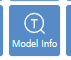 선택
  > 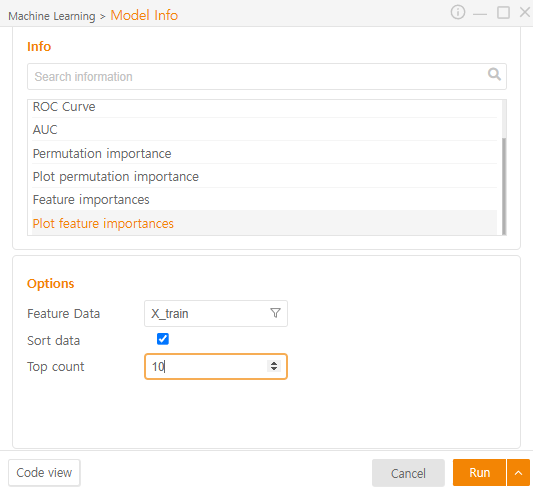  

In [161]:
# Visual Python: Machine Learning > Model Info
def vp_plot_feature_importances(model, X_train=None, sort=False, top_count=0):
    df_i = vp_create_feature_importances(model, X_train, sort)
                        
    if sort: 
        if top_count > 0:
            df_i['Percentage'].sort_values().tail(top_count).plot(kind='barh')
        else:
            df_i['Percentage'].sort_values().plot(kind='barh')
    else: 
        df_i['Percentage'].plot(kind='barh')
    plt.xlabel('Feature importance Percentage')
    plt.ylabel('Features')
                        
    plt.show()

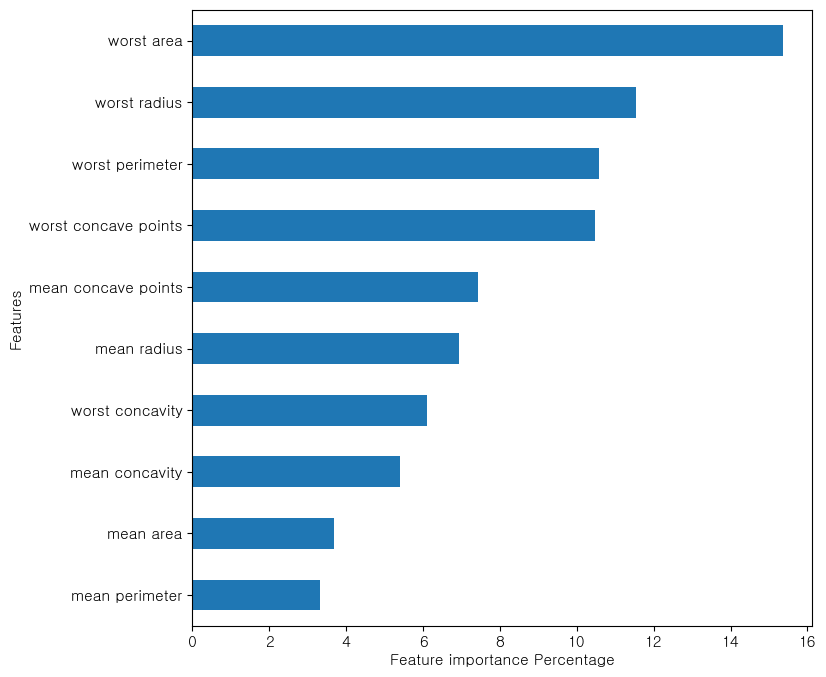

In [162]:
# Visual Python: Machine Learning > Model Info
vp_plot_feature_importances(model, X_train, sort=True, top_count=10)

## 실습 
* 노인의 삶의 질에 대한 평가
* 파일명: final_pre3.csv
* 위와 동일한 과정으로 진행해 보자  

In [174]:
# Visual Python: Data Analysis > File
vp_df = pd.read_csv('./final_pre3.csv')
vp_df

,결혼,모임횟수,여가참여,학력,연령,성별,거주지역,거주지역크기,건강보험가입,민간보험가입,...,흡연,음주,비만지수,일상생활수행,인지기능,만성질환갯수,비만정도,우울증,우울증지수,삶질만족_1
0,1,10,2,4,52,1,11,1,1,1,...,3,1,25.510204,0,29.0,0,2.0,0,1.6,0
1,1,10,2,1,60,2,11,1,1,2,...,1,3,24.141519,0,27.0,2,3.0,0,1.2,0
2,1,10,2,1,62,2,11,1,1,1,...,1,3,20.000000,0,27.0,0,4.0,0,1.5,0
3,1,10,2,1,60,1,11,1,1,2,...,3,1,22.675737,0,29.0,0,4.0,0,1.4,0
4,1,10,2,2,55,2,11,1,1,2,...,1,3,25.476660,0,29.0,0,2.0,0,1.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,1,1,2,4,45,2,38,3,1,1,...,3,1,21.082813,0,30.0,0,4.0,0,1.5,1
1596,1,7,2,1,62,1,38,3,1,2,...,2,1,21.484375,0,24.0,0,4.0,1,1.9,0
1597,1,2,2,1,54,1,38,3,1,2,...,3,3,25.689562,0,27.0,1,2.0,0,1.3,1
1598,1,4,2,3,48,2,38,3,1,1,...,1,1,23.147255,0,28.0,0,3.0,0,2.2,1


In [190]:
# Visual Python: Data Analysis > Frame
df2 = vp_df.copy()
df2.drop(['삶질만족_1'], axis=1, inplace=True)
df2

,결혼,모임횟수,여가참여,학력,연령,성별,거주지역,거주지역크기,건강보험가입,민간보험가입,...,주택소유형태,흡연,음주,비만지수,일상생활수행,인지기능,만성질환갯수,비만정도,우울증,우울증지수
0,1,10,2,4,52,1,11,1,1,1,...,1,3,1,25.510204,0,29.0,0,2.0,0,1.6
1,1,10,2,1,60,2,11,1,1,2,...,1,1,3,24.141519,0,27.0,2,3.0,0,1.2
2,1,10,2,1,62,2,11,1,1,1,...,1,1,3,20.000000,0,27.0,0,4.0,0,1.5
3,1,10,2,1,60,1,11,1,1,2,...,1,3,1,22.675737,0,29.0,0,4.0,0,1.4
4,1,10,2,2,55,2,11,1,1,2,...,1,1,3,25.476660,0,29.0,0,2.0,0,1.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,1,1,2,4,45,2,38,3,1,1,...,1,3,1,21.082813,0,30.0,0,4.0,0,1.5
1596,1,7,2,1,62,1,38,3,1,2,...,1,2,1,21.484375,0,24.0,0,4.0,1,1.9
1597,1,2,2,1,54,1,38,3,1,2,...,1,3,3,25.689562,0,27.0,1,2.0,0,1.3
1598,1,4,2,3,48,2,38,3,1,1,...,1,1,1,23.147255,0,28.0,0,3.0,0,2.2


In [198]:
# Visual Python: Data Analysis > Subset
y2 = vp_df.loc[:, '삶질만족_1']
y2

0       0
1       0
2       0
3       0
4       0
       ..
1595    1
1596    0
1597    1
1598    1
1599    0
Name: 삶질만족_1, Length: 1600, dtype: int64

In [206]:
# Visual Python: Machine Learning > Data Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df2, y2)

In [211]:
# Visual Python: Machine Learning > Classifier
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

In [219]:
# Visual Python: Machine Learning > Fit/Predict
model.fit(X_train, y_train)

RandomForestClassifier()

In [225]:
# Visual Python: Machine Learning > Fit/Predict
pred = model.predict(X_test)
pred

array([0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,

In [238]:
# Visual Python: Machine Learning > Evaluation
from IPython.display import display, Markdown

In [239]:
# Visual Python: Machine Learning > Evaluation
# Confusion Matrix
display(Markdown('### Confusion Matrix'))
display(pd.crosstab(y_test, pred, margins=True))

### Confusion Matrix

col_0,0,1,All
삶질만족_1,,,
0,171,47,218
1,88,94,182
All,259,141,400


In [240]:
# Visual Python: Machine Learning > Evaluation
# Classification report
print(metrics.classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.66      0.78      0.72       218
           1       0.67      0.52      0.58       182

    accuracy                           0.66       400
   macro avg       0.66      0.65      0.65       400
weighted avg       0.66      0.66      0.66       400



In [241]:
# Visual Python: Machine Learning > Evaluation
# Accuracy
print('Accuracy: {}'.format(metrics.accuracy_score(y_test, pred)))

Accuracy: 0.6625


In [248]:
# Visual Python: Machine Learning > Model Info
df_i = vp_create_feature_importances(model, X_train, sort=True)
df_i

,Feature_importance,Percentage
월임금,0.12,12.19
비만지수,0.10,9.89
연령,0.08,7.78
노동시간,0.07,7.00
우울증지수,0.07,6.52
거주지역,0.06,6.39
인지기능,0.06,5.82
모임횟수,0.05,5.18
학력,0.04,4.46
고용형태,0.04,3.80


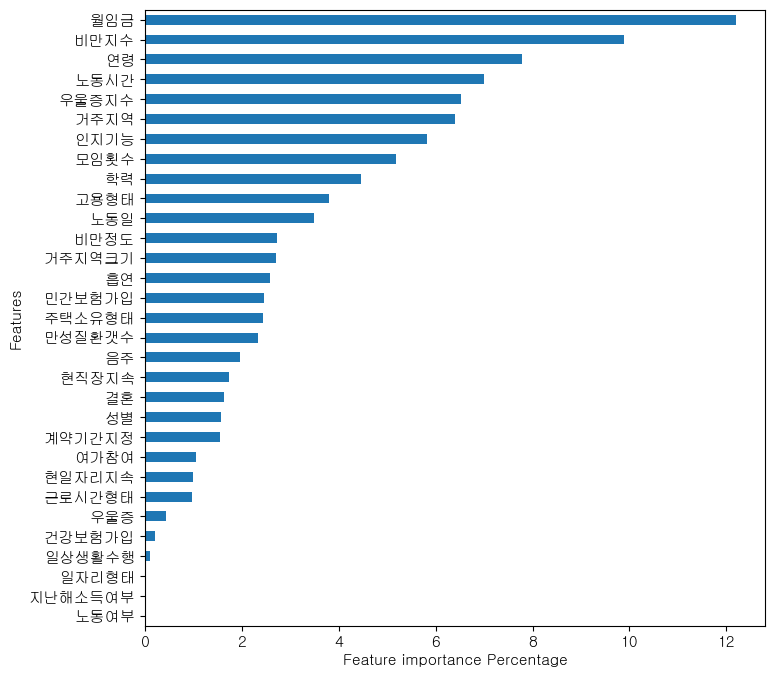

In [255]:
# Visual Python: Machine Learning > Model Info
vp_plot_feature_importances(model, X_train, sort=True)

# 새로운 모델을 이용한 학습/평가 진행 - 파라미터 조정
* 과적합 문제
* 성능향상
* 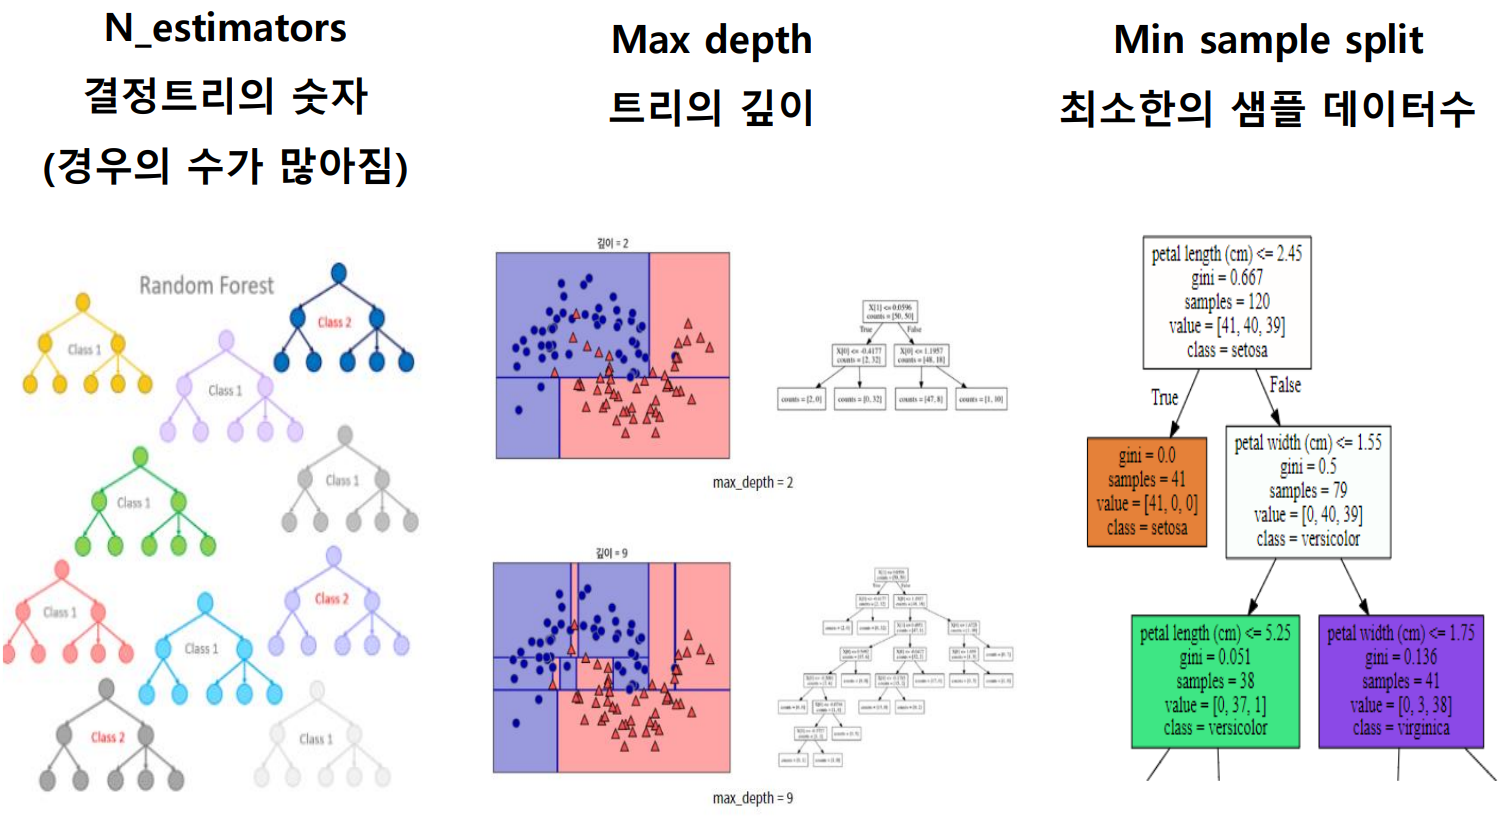    

In [260]:
# Visual Python: Machine Learning > Classifier
from sklearn.ensemble import RandomForestClassifier

model2 = RandomForestClassifier(n_estimators=300, max_depth=8, min_samples_split=10)

In [268]:
# Visual Python: Machine Learning > Fit/Predict
model2.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, min_samples_split=10, n_estimators=300)

In [274]:
# Visual Python: Machine Learning > Fit/Predict
pred = model2.predict(X_test)
pred

array([0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,

In [287]:
# Visual Python: Machine Learning > Evaluation
from IPython.display import display, Markdown

In [288]:
# Visual Python: Machine Learning > Evaluation
# Confusion Matrix
display(Markdown('### Confusion Matrix'))
display(pd.crosstab(y_test, pred, margins=True))

### Confusion Matrix

col_0,0,1,All
삶질만족_1,,,
0,170,48,218
1,84,98,182
All,254,146,400


In [289]:
# Visual Python: Machine Learning > Evaluation
# Classification report
print(metrics.classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.67      0.78      0.72       218
           1       0.67      0.54      0.60       182

    accuracy                           0.67       400
   macro avg       0.67      0.66      0.66       400
weighted avg       0.67      0.67      0.66       400



In [290]:
# Visual Python: Machine Learning > Evaluation
# Accuracy
print('Accuracy: {}'.format(metrics.accuracy_score(y_test, pred)))

Accuracy: 0.67


In [291]:
# Visual Python: Machine Learning > Evaluation
# Precision
print('Precision: {}'.format(metrics.precision_score(y_test, pred, average='weighted')))

Precision: 0.6701747384316686
